# Dealing with Missing Data

## Learning Goals

<li> Indentify missing data</li>

<li> Imputation with KNN</li>

<li> Imputation with mean</li>
<li> Imputation with mean linear Regression </li>

<li> Compare the R2 score with the different imputation method </li>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Part I. Indentify missing data

In [2]:
# generate data set with NaNS
df = pd.DataFrame(np.random.randn(10,6))
# np.random.randn(10, 6) would give you a 10x6 array filled with random numbers drawn 
# from a standard normal distribution.

# Make a few areas have NaN values
df.iloc[1:3,1] = np.nan
df.iloc[5,3] = np.nan
df.iloc[7:9,5] = np.nan

# The first part before the comma e.g., `[1:3]` specifies the rows you want to access, 
# and the second part `[,1]` specifies the column

In [3]:
df

,0,1,2,3,4,5
0,-0.285563,-1.602252,-0.581095,0.691803,-1.007097,-1.608630
1,0.212048,NaN,0.185754,2.057867,0.280433,-0.091076
2,-0.191592,NaN,-0.841253,1.063702,0.935709,0.261139
3,-1.065709,-0.735684,-0.046662,0.176965,-1.480728,-0.349543
4,-1.612588,-1.350634,0.030818,-0.435684,1.097564,1.054064
5,0.848805,-0.989954,1.103170,NaN,-0.132943,-1.791174
6,1.254429,0.475423,1.055423,0.255935,0.286532,0.310468
7,0.084800,-0.152235,-1.446050,1.944795,1.118846,NaN
8,-0.497305,0.440843,1.133434,-0.486629,-1.869150,NaN
9,1.577043,1.109471,0.331750,1.588869,0.535910,0.687349


In [54]:
df

,0,1,2,3,4,5
0,-0.285563,-1.602252,-0.581095,0.691803,-1.007097,-1.608630
1,0.212048,NaN,0.185754,2.057867,0.280433,-0.091076
2,-0.191592,NaN,-0.841253,1.063702,0.935709,0.261139
3,-1.065709,-0.735684,-0.046662,0.176965,-1.480728,-0.349543
4,-1.612588,-1.350634,0.030818,-0.435684,1.097564,1.054064
5,0.848805,-0.989954,1.103170,NaN,-0.132943,-1.791174
6,1.254429,0.475423,1.055423,0.255935,0.286532,0.310468
7,0.084800,-0.152235,-1.446050,1.944795,1.118846,NaN
8,-0.497305,0.440843,1.133434,-0.486629,-1.869150,NaN
9,1.577043,1.109471,0.331750,1.588869,0.535910,0.687349


In [4]:
# Indentify the NaNs with .isnull(), .isnull().any(), .isnull().sum()
# you code here
df.isnull()

,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,True
8,False,False,False,False,False,True
9,False,False,False,False,False,False


In [52]:
df.isnull().any()

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool

In [6]:
df.isnull().any().any()

True

In [7]:
df.isnull().sum()

0    0
1    2
2    0
3    1
4    0
5    2
dtype: int64

In [8]:
df.isnull().sum().sum()

5

In [53]:
# Indentify the sepcific column hasnans with df['column'].hasnans
df[1].hasnans


True

## Part II: Imputation 

In [10]:
# Let's generate another sample data with nans
data = {
    'Age': [25, np.nan, 30, 35, 40, np.nan, 50],
    'Salary': [50000, 60000, np.nan, 65000, 70000, 80000, 90000],
    'Experience': [1,3 ,5, 4, 5, 6, np.nan]
}
data_df = pd.DataFrame(data)
data_df

,Age,Salary,Experience
0,25.0,50000.0,1.0
1,NaN,60000.0,3.0
2,30.0,NaN,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,NaN,80000.0,6.0
6,50.0,90000.0,NaN


In [11]:
# generate the scatter plot of data_df['Salary'] vs data_df['Age']

    Age   Salary  Experience
0  25.0  50000.0         1.0
1   NaN  60000.0         3.0
2  30.0      NaN         5.0
3  35.0  65000.0         4.0
4  40.0  70000.0         5.0
5   NaN  80000.0         6.0
6  50.0  90000.0         NaN


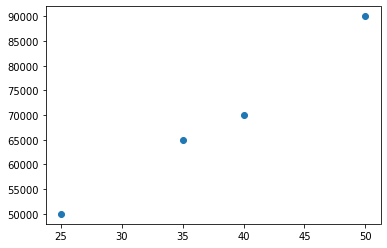

In [12]:
# generate the scatter plot of data_df['Salary'] vs data_df['Age']
print(data_df)
plt.scatter(data_df['Age'],data_df['Salary'])
plt.show()

In [13]:
# generate the scatter plot of data_df['Salary'] vs data_df['Experience']


    Age   Salary  Experience
0  25.0  50000.0         1.0
1   NaN  60000.0         3.0
2  30.0      NaN         5.0
3  35.0  65000.0         4.0
4  40.0  70000.0         5.0
5   NaN  80000.0         6.0
6  50.0  90000.0         NaN


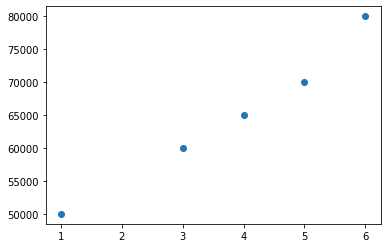

In [14]:
# generate the scatter plot of data_df['Salary'] vs data_df['Experience']
print(data_df)

plt.scatter(data_df['Experience'],data_df['Salary'])
plt.show()

### Imputation with Mean

sklearn.impute.SimpleImputer(strategy='mean')


>imputer = SimpleImputer(strategy='mean')

>imputed_data = imputer.fit_transform(data_with_nans)



Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html




In [15]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with 'mean' strategy

imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform it to fill in missing values
imputed_data = imputer.fit_transform(data_df)

# Convert the array back to a DataFrame
imputed_data_df = pd.DataFrame(imputed_data, columns=data_df.columns)

imputed_data_df

,Age,Salary,Experience
0,25.0,50000.000000,1.0
1,36.0,60000.000000,3.0
2,30.0,69166.666667,5.0
3,35.0,65000.000000,4.0
4,40.0,70000.000000,5.0
5,36.0,80000.000000,6.0
6,50.0,90000.000000,4.0


In [16]:
data_df

,Age,Salary,Experience
0,25.0,50000.0,1.0
1,NaN,60000.0,3.0
2,30.0,NaN,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,NaN,80000.0,6.0
6,50.0,90000.0,NaN


In [17]:
# Initialize the SimpleImputer with 'median' strategy

### Imputation with KNN


https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset.
In this approach, we specify a distance from the missing values which is also known as the K parameter. 
The missing value will be predicted in reference to the mean of the neighbours. It is implemented by the KNNimputer() method which contains the following arguments:

>imputer = KNNImputer(n_neighbors=2)


>imputer.fit_transform(X)


In [18]:
from sklearn.impute import KNNImputer

# Create imputer object with n_neighbors set to 2
knn_imputer = KNNImputer(n_neighbors=2)

In [19]:
# # Fit on the data and transform it and put in into the dataframe

df_filled_knn = pd.DataFrame(knn_imputer.fit_transform(data_df), columns=data_df.columns)


In [20]:
print("Data after KNN Imputation:")
df_filled_knn

Data after KNN Imputation:


,Age,Salary,Experience
0,25.0,50000.0,1.0
1,32.5,60000.0,3.0
2,30.0,70000.0,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,35.0,80000.0,6.0
6,50.0,90000.0,5.5


In [21]:
data_df

,Age,Salary,Experience
0,25.0,50000.0,1.0
1,NaN,60000.0,3.0
2,30.0,NaN,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,NaN,80000.0,6.0
6,50.0,90000.0,NaN


### Imputation with LinearRegression


In [22]:
# Make a copy of the original DataFrame to avoid modifying it directly
imputed_df = data_df.copy()

In [23]:
# Step 1: Select the target column with missing values
target_column = 'Age'

# Prepare the data: Separate rows with and without missing target values
complete_data = imputed_df.dropna(subset=[target_column])

print ('This is the complete_data')
print (complete_data)
print ('----------------')
missing_data = imputed_df[imputed_df[target_column].isna()]
print ('This is the complete_data')
print (missing_data)

This is the complete_data
    Age   Salary  Experience
0  25.0  50000.0         1.0
2  30.0      NaN         5.0
3  35.0  65000.0         4.0
4  40.0  70000.0         5.0
6  50.0  90000.0         NaN
----------------
This is the complete_data
   Age   Salary  Experience
1  NaN  60000.0         3.0
5  NaN  80000.0         6.0


In [24]:
# Step 2: Prepare the training data (excluding rows with missing target values)
X_train = complete_data.drop(columns=[target_column])
y_train = complete_data[target_column]

In [25]:
X_train

,Salary,Experience
0,50000.0,1.0
2,NaN,5.0
3,65000.0,4.0
4,70000.0,5.0
6,90000.0,NaN


In [26]:
# Handle missing values in predictor columns for training (simple imputation)
for column in X_train.columns:
    if X_train[column].isna().any():
        X_train[column].fillna(X_train[column].mean(), inplace=True)

# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.coef_

array([ 6.70319253e-04, -6.96026607e-01])

In [28]:
# Prepare the data for prediction (exclude target column and handle missing predictors)
X_missing = missing_data.drop(columns=[target_column])
for column in X_missing.columns:
    if X_missing[column].isna().any():
        X_missing[column].fillna(X_missing[column].mean(), inplace=True)

In [29]:
X_missing

,Salary,Experience
1,60000.0,3.0
5,80000.0,6.0


In [30]:
# Step 4: Predict the missing values in the target column
predicted_values = model.predict(X_missing)


In [31]:
# Step 5: Fill in the missing values in the original dataset
imputed_df.loc[imputed_df[target_column].isna(), target_column] = predicted_values
imputed_df

,Age,Salary,Experience
0,25.000000,50000.0,1.0
1,30.656726,60000.0,3.0
2,30.000000,NaN,5.0
3,35.000000,65000.0,4.0
4,40.000000,70000.0,5.0
5,41.975032,80000.0,6.0
6,50.000000,90000.0,NaN


In [32]:
data_df

,Age,Salary,Experience
0,25.0,50000.0,1.0
1,NaN,60000.0,3.0
2,30.0,NaN,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,NaN,80000.0,6.0
6,50.0,90000.0,NaN


###  Now Let's put everything into a Function

In [33]:
def linear_regression_imputation(data_df,target_column):
 
    # Make a copy of the original DataFrame to avoid modifying it directly
    imputed_df = data_df.copy()
    
    # Step 1: Select the target column with missing values
    complete_data = imputed_df.dropna(subset=[target_column])
 
    missing_data = imputed_df[imputed_df[target_column].isna()]
    # Step 2: Prepare the training data (excluding rows with missing target values)
    X_train = complete_data.drop(columns=[target_column])
    y_train = complete_data[target_column]
    
    # Handle missing values in predictor columns for training (simple imputation)
    for column in X_train.columns:
        if X_train[column].isna().any():
            X_train[column].fillna(X_train[column].mean(), inplace=True)
            
    # Step 3: Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Prepare the data for prediction (exclude target column and handle missing predictors)
    X_missing = missing_data.drop(columns=[target_column])
    for column in X_missing.columns:
        if X_missing[column].isna().any():
            X_missing[column].fillna(X_missing[column].mean(), inplace=True)
    # Step 4: Predict the missing values in the target column
    
    predicted_values = model.predict(X_missing)
    # Step 5: Fdata_df_imput=ill in the missing values in the original dataset
    imputed_df.loc[imputed_df[target_column].isna(), target_column] = predicted_values


    return imputed_df



In [35]:
data_df_imputed = linear_regression_imputation(data_df,'Age')
data_df_imputed=pd.DataFrame(data_df_imputed, columns=data_df.columns)
data_df_imputed

,Age,Salary,Experience
0,25.000000,50000.0,1.0
1,30.656726,60000.0,3.0
2,30.000000,NaN,5.0
3,35.000000,65000.0,4.0
4,40.000000,70000.0,5.0
5,41.975032,80000.0,6.0
6,50.000000,90000.0,NaN


In [36]:
data_df_imputed = linear_regression_imputation(data_df,'Experience')
data_df_imputed=pd.DataFrame(data_df_imputed, columns=data_df.columns)
data_df_imputed

,Age,Salary,Experience
0,25.0,50000.0,1.0
1,NaN,60000.0,3.0
2,30.0,NaN,5.0
3,35.0,65000.0,4.0
4,40.0,70000.0,5.0
5,NaN,80000.0,6.0
6,50.0,90000.0,8.5


##  Imputation with LinearRegression with uncertainty

In [37]:
def linear_regression_imputation_with_uncertainty(df, target):
    # Impute other columns using mean imputation to handle NaNs in predictors
    imputer = SimpleImputer(strategy='mean')
    predictors = df.drop(columns=[target])
    df[predictors.columns] = imputer.fit_transform(predictors)

    # Separate into datasets with and without missing target values
    df_with_target = df[df[target].notnull()]
    df_without_target = df[df[target].isnull()]

    # Check if there is anything to impute
    if df_without_target.empty:
        return df

    # Separate target and predictors
    X = df_with_target.drop(columns=[target])
    y = df_with_target[target]

    # Fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict and calculate the error on the training set
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)

    # Predict the missing values
    X_missing = df_without_target.drop(columns=[target])
    predicted = model.predict(X_missing)

    # Add random noise to the predicted values to introduce uncertainty
    # Noise is drawn from a normal distribution with mean 0 and std equal to rmse
    noise = np.random.normal(0, rmse, size=predicted.shape)
    predicted_with_uncertainty = predicted + noise

    df.loc[df[target].isnull(), target] = predicted_with_uncertainty

    return df


In [38]:
# Apply the function for each column with missing values
for column in data_df.columns:
    df_3 = linear_regression_imputation_with_uncertainty(data_df, column)

In [39]:
print("Data after Linear Regression Imputation with Uncertainty:")
df_3

Data after Linear Regression Imputation with Uncertainty:


,Age,Salary,Experience
0,25.00000,50000.000000,1.0
1,34.96213,60000.000000,3.0
2,30.00000,69166.666667,5.0
3,35.00000,65000.000000,4.0
4,40.00000,70000.000000,5.0
5,40.56073,80000.000000,6.0
6,50.00000,90000.000000,4.0


### Exercise : 

1. Read a larger data set from missing_data_df.csv 
2. Indentify the NaNs in each columns


3. Plot the Salary with Age and Salary with Experience

4. Do the imputation with 
1) drop nan
2) Mean
4) KNN
3) Linear regression with linear_regression_imputation_with_uncertainty

5. Compute the linear regression R2 score with the three imputation method

In [40]:
larger_data_df = pd.read_csv("data/missing_data_df.csv")
larger_data_df.head()

,Age,Experience,Salary
0,58.0,6.0,93691.067676
1,48.0,6.0,91262.166674
2,34.0,7.0,70537.396308
3,27.0,4.0,62426.317793
4,NaN,2.0,NaN


In [41]:
larger_data_df.isnull().any()

Age           True
Experience    True
Salary        True
dtype: bool

In [42]:
larger_data_df.isnull().sum()

Age           10
Experience     5
Salary        13
dtype: int64

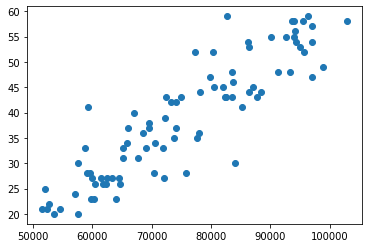

In [43]:
plt.scatter(larger_data_df['Salary'],larger_data_df['Age'])

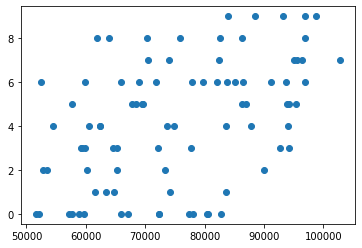

In [44]:
plt.scatter(larger_data_df['Salary'],larger_data_df['Experience'])

In [45]:
# Drop NaN values
data_dropped = larger_data_df.dropna()

# Separate predictors and target
X_dropped = data_dropped[['Age', 'Experience']]
y_dropped = data_dropped['Salary']


# Linear Regression
model_drop = LinearRegression()
model_drop.fit(X_dropped, y_dropped)

y_pred_drop = model_drop.predict(X_dropped)
r2_score(y_dropped, y_pred_drop)


0.889549031590729

In [46]:
# Initialize the SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform it to fill in missing values
imputed_mean_data = imputer.fit_transform(larger_data_df)

# Convert the array back to a DataFrame
imputed_mean_data_df = pd.DataFrame(imputed_mean_data, columns=larger_data_df.columns)

In [47]:
# Continue with the linear regression using imputed values
X_mean = imputed_mean_data_df[['Age', 'Experience']]
y_mean = imputed_mean_data_df['Salary']


model_mean = LinearRegression()
model_mean.fit(X_mean, y_mean)  

y_pred_mean = model_mean.predict(X_mean)
r2_score(y_mean, y_pred_mean)

0.8345991279176928

In [48]:
# Impute missing values using KNN
knn_imputer = KNNImputer(n_neighbors=2)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(larger_data_df), columns=larger_data_df.columns)

X_knn = data_knn_imputed[['Age', 'Experience']]
y_knn = data_knn_imputed['Salary']


model_knn = LinearRegression()
model_knn.fit(X_knn, y_knn)

y_pred_knn = model_knn.predict(X_knn)
r2_score(y_knn, y_pred_knn)

0.8986101318319933

In [49]:
# Apply the function for each column with missing values
for column in larger_data_df.columns:
    data_lr_imputed = linear_regression_imputation_with_uncertainty(larger_data_df, column)

In [50]:
# Continue with the linear regression using imputed values
X_lr = data_lr_imputed[['Age', 'Experience']]
y_lr = data_lr_imputed['Salary']


model_linreg = LinearRegression()
model_linreg.fit(X_lr, y_lr)  

y_pred_linreg = model_linreg.predict(X_lr)
r2_score(y_lr, y_pred_linreg)

0.8127914190143388